# Image Classification of an American Sign Language Dataset

## Objectives

* Prepare image data for training
* Create and compile a simple model for image classification
* Train an image classification model and observe the results

### Kaggle

This dataset is available from the website [Kaggle](http://www.kaggle.com), which is a fantastic place to find datasets and other deep learning resources. In addition to providing resources like datasets and "kernels" that are like these notebooks, Kaggle hosts competitions that you can take part in, competing with others in training highly accurate models.

If you're looking to practice or see examples of many deep learning projects, Kaggle is a great site to visit.

## Loading the Data

This dataset is not available via Keras in the same way that MNIST is, so let's learn how to load custom data. By the end of this section we will have `x_train`, `y_train`, `x_valid`, and `y_valid` variables as before.

### Reading in the Data

The sign language dataset is in [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) (Comma Separated Values) format, the same data structure behind Microsoft Excel and Google Sheets. It is a grid of rows and columns with labels at the top, as seen in the [train](data/asl_data/sign_mnist_train.csv) and [valid](data/asl_data/sign_mnist_valid.csv) datasets (they may take a moment to load).

To load and work with the data, we'll be using a library called [Pandas](https://pandas.pydata.org/), which is a highly performant tool for loading and manipulating data. We'll read the CSV files into a format called a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [1]:
import pandas as pd

In [1]:
import pandas as pd
import os

# Verifikasi apakah file ada
train_path = "sign_mnist_train.csv"
valid_path = "sign_mnist_valid.csv"

if os.path.isfile(train_path) and os.path.isfile(valid_path):
    # Membaca dataset
    train_df = pd.read_csv(train_path)
    valid_df = pd.read_csv(valid_path)
    print("File berhasil dibaca!")
else:
    print("File tidak ditemukan. Pastikan jalur file benar.")
    print("Isi direktori 'data/asl_data/':", os.listdir("data/asl_data/"))

File berhasil dibaca!


### Exploring the Data

In [5]:
# Import pustaka yang diperlukan
import pandas as pd

# Memuat data ke dalam DataFrame
# Gantilah 'path_to_your_csv_file.csv' dengan path sebenarnya ke file CSV Anda
train_df = pd.read_csv('sign_mnist_train.csv')

# Mengakses beberapa baris pertama dari DataFrame
print(train_df.head())



   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


### Extracting the Labels

In [8]:
import pandas as pd

# Memuat data ke dalam DataFrame
# Gantilah 'path_to_train_csv_file.csv' dan 'path_to_valid_csv_file.csv' dengan path sebenarnya ke file CSV Anda
train_df = pd.read_csv('sign_mnist_train.csv')
valid_df = pd.read_csv('sign_mnist_valid.csv')

# Memisahkan label dari fitur
y_train = train_df['label']
y_valid = valid_df['label']

# Menghapus kolom label dari DataFrame
del train_df['label']
del valid_df['label']

# Verifikasi hasil
print(y_train.head())
print(y_valid.head())
print(train_df.head())
print(valid_df.head())


0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64
0     6
1     5
2    10
3     0
4     3
Name: label, dtype: int64
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     107     118     127     134     139     143     146     150     153   
1     155     157     156     156     156     157     156     158     158   
2     187     188     188     187     187     186     187     188     187   
3     211     211     212     212     211     210     211     210     210   
4     164     167     170     172     176     179     180     184     185   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      156  ...       207       207       207       207       206       206   
1      157  ...        69       149       128        87        94       163   
2      186  ...       202       201       200       199       198       199   
3      211  ...       235       234       233       231       230       226   
4      186

### Extracting the Images

In [9]:
x_train = train_df.values
x_valid = valid_df.values

### Summarizing the Training and Validation Data

In [10]:
x_train.shape

(27455, 784)

In [11]:
y_train.shape

(27455,)

In [12]:
x_valid.shape

(7172, 784)

In [13]:
y_valid.shape

(7172,)

## Visualizing the Data

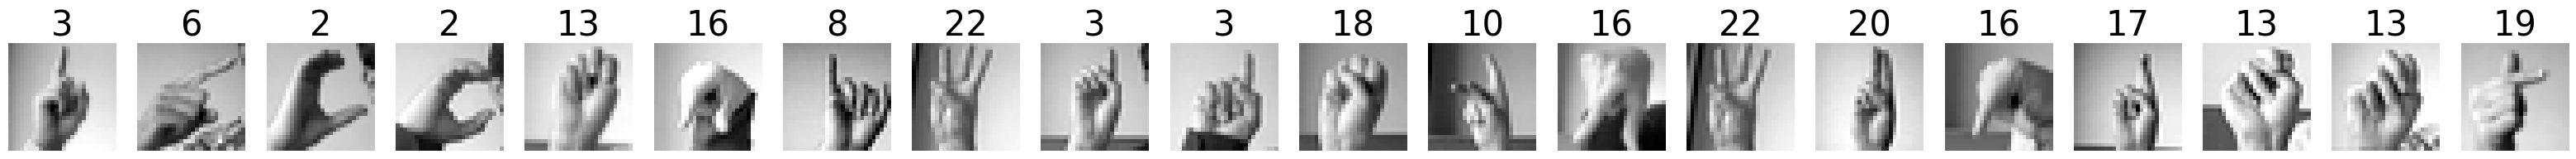

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## Exercise: Normalize the Image Data

In [15]:
x_train.min()

0

In [16]:
x_train.max()

255

In [17]:
# TODO: Normalize x_train and x_valid.
x_train = x_train / 255
x_valid = x_valid / 255

 ### solusi

```python
x_train = x_train / 255
x_valid = x_valid / 255
```

## Exercise: Categorize the Labels

In [18]:
import tensorflow.keras as keras
num_classes = 24

In [20]:
import pandas as pd
from tensorflow import keras

# Memuat data ke dalam DataFrame
train_df = pd.read_csv('sign_mnist_train.csv')
valid_df = pd.read_csv('sign_mnist_valid.csv')

# Memisahkan label dari fitur
y_train = train_df['label']
y_valid = valid_df['label']

# Menghapus kolom label dari DataFrame
del train_df['label']
del valid_df['label']

# Menentukan jumlah kelas berdasarkan nilai maksimum di label
num_classes = max(y_train.max(), y_valid.max()) + 1

# Mengencode label secara kategorikal
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Verifikasi hasil
print(y_train.shape)
print(y_valid.shape)
print(train_df.head())
print(valid_df.head())


(27455, 25)
(7172, 25)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     107     118     127     134     139     143     146     150     153   
1     155     157     156     156     156     157     156     158     158   
2     187     188     188     187     187     186     187     188     187   
3     211     211     212     212     211     210     211     210     210   
4     164     167     170     172     176     179     180     184     185   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      156  ...       207       207       207       207       206       206   
1      157  ...        69       149       128        87        94       163   
2      186  ...       202       201       200       199       198       199   
3      211  ...       235       234       233       231       230       226   
4      186  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel7

## solusi

Click on the '...' below to show the solution.

```python
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
```

## Exercise: Build the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# TODO: build a model following the guidelines above.
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

c:\Users\aryas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Summarizing the Model

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 677,401 (2.58 MB)

 Trainable params: 677,401 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

In [24]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Exercise: Train the Model

In [25]:
# TODO: Train the model for 20 epochs.
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2487 - loss: 2.4677 - val_accuracy: 0.5542 - val_loss: 1.3886
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6396 - loss: 1.0597 - val_accuracy: 0.4318 - val_loss: 2.2725
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7885 - loss: 0.6387 - val_accuracy: 0.7547 - val_loss: 0.8257
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8658 - loss: 0.4032 - val_accuracy: 0.7849 - val_loss: 0.8473
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9095 - loss: 0.2988 - val_accuracy: 0.6701 - val_loss: 1.6100
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9288 - loss: 0.2523 - val_accuracy: 0.8281 - val_loss: 0.7614
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9444 - loss: 0.2145 - val_accuracy: 0.8157 - val_loss: 0.9073
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9510 - loss: 0.2044 - val_accuracy: 0.

## Summary

### Clear the Memory
Before moving on, please execute the following cell to clear up the GPU memory. This is required to move on to the next notebook.

In [26]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

: 